<a href="https://colab.research.google.com/github/ranjiGT/Cloyster/blob/master/Kmeans_Basic_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Kmeans Clustering -  Network Segmentation, Customer Segmentation***

<font color='red'> ***video link***</font> https://www.youtube.com/watch?v=397Xqt_RJS8&t=19s

In [29]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [30]:
df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Expenditure'}, inplace = True)

In [31]:
df

,CustomerID,Gender,Age,Income,Expenditure
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [32]:
df.describe(include='all')

,CustomerID,Gender,Age,Income,Expenditure
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [33]:
import seaborn as sns

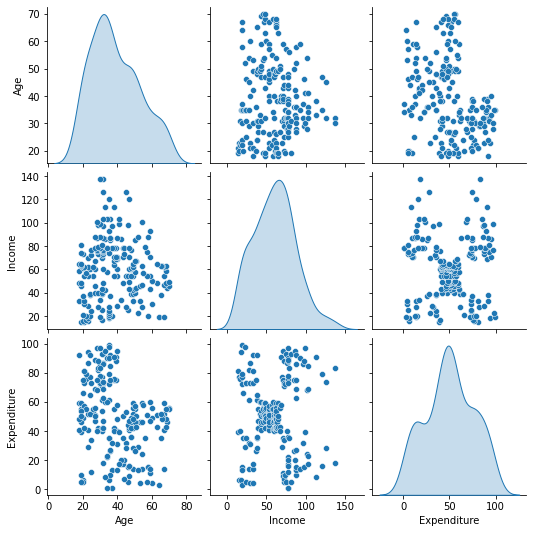

In [34]:
sns.pairplot(df[['Age','Income', 'Expenditure']], diag_kind='kde')

In [ ]:
import sklearn.cluster as cluster

In [35]:
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Expenditure','Income']])

In [36]:
kmeans.cluster_centers_

array([[79.36363636, 25.72727273],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783]])

In [37]:
df['Clusters'] = kmeans.labels_

In [38]:
df['Clusters']

0      4
1      0
2      4
3      0
4      4
      ..
195    2
196    3
197    2
198    3
199    2
Name: Clusters, Length: 200, dtype: int32

In [39]:
df.head(20)

,CustomerID,Gender,Age,Income,Expenditure,Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
5,6,Female,22,17,76,0
6,7,Female,35,18,6,4
7,8,Female,23,18,94,0
8,9,Male,64,19,3,4
9,10,Female,30,19,72,0


In [40]:
df['Clusters'].value_counts()

1    81
2    39
3    35
4    23
0    22
Name: Clusters, dtype: int64

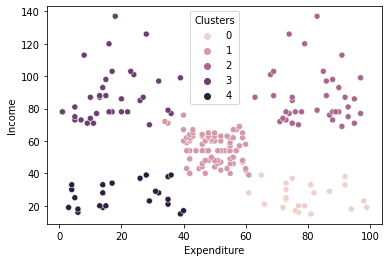

In [41]:
sns.scatterplot(x="Expenditure", y="Income",hue = 'Clusters',  data=df)